In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import cv2

In [31]:
#loading fashion mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape: ", x_train.shape, "y_train shape: ", y_train.shape) 

x_train shape:  (60000, 28, 28) y_train shape:  (60000,)


x_train shape:  (60000, 28, 28) y_train shape:  (60000,)
training set:  60000
testing set:  10000
y =  2  Pullover


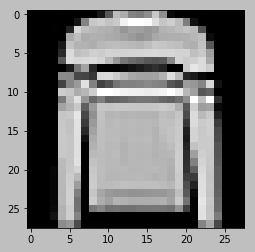

In [35]:
#VISUALIZING DATA

#printing training set shape and number of training and test datasets
print("x_train shape: ", x_train.shape, "y_train shape: ", y_train.shape)
print("training set: ", x_train.shape[0])
print("testing set: ", x_test.shape[0])

#Defining text labels
fashion_mnist_labels = [
    "T-shirt/top", #ind 0
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot" #ind 9
]

img_index = 5
label_index = y_train[img_index]
print("y = " , str(label_index) , " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])
plt.style.use('grayscale')
plt.show()


In [34]:
#normalizing data dimensions
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print("number of training data: ", str((len(x_train))))
print("number of testing data: ", str((len(x_test))))


number of training data:  60000
number of testing data:  10000


In [18]:
#SORTING DATA INTO TRAIN/VALIDATION/TEST SETS

#sort training data into training/validation sets
x_train, x_valid = x_train[5000: ], x_train[:5000]
y_train, y_valid = y_train[5000: ], y_train[:5000]

#reshaping input data into (28,28,1)
w, h = 28,28
x_train = x_train.reshape(x_train.shape[0],w,h,1)
x_valid = x_valid.reshape(x_valid.shape[0],w,h,1)
x_test = x_test.reshape(x_test.shape[0],w,h,1) 

#encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#print training set shapes
print("x_train shape: ", x_train.shape, "y_train shape: ", y_train.shape)

#print number of training, validation, and test datasets
print("train set: ", x_train.shape[0])
print("validation set: ", x_valid.shape[0])
print("test set: ", x_test.shape[0])

x_train shape:  (55000, 28, 28, 1) y_train shape:  (55000, 10)
train set:  55000
validation set:  5000
test set:  10000


In [19]:
#CREATING MODEL STRUCTURE

model = tf.keras.Sequential()

#defining input shape for first layer of neural net
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3)) 

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

 
#model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

In [20]:
#COMPILING MODEL BEFORE TRAINING

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [21]:
#TRAINING MODEL

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 45s 812us/step - loss: 0.5831 - acc: 0.7863 - val_loss: 0.3524 - val_acc: 0.8818

Epoch 00001: val_loss improved from inf to 0.35242, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 45s 821us/step - loss: 0.4011 - acc: 0.8530 - val_loss: 0.3068 - val_acc: 0.8906

Epoch 00002: val_loss improved from 0.35242 to 0.30682, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 46s 840us/step - loss: 0.3550 - acc: 0.8692 - val_loss: 0.2866 - val_acc: 0.8948

Epoch 00003: val_loss improved from 0.30682 to 0.28660, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 46s 845us/step - loss: 0.3322 - acc: 0.8779 - val_loss: 0.2709 - val_acc: 0.9008

Epoch 00004: val_loss improved from 0.28660 to 0.27094, saving model to model.weights.best.hdf5
Epoch 5/10


In [22]:
#LOADING MODEL WITH BEST VALIDATION ACCURACY
model.load_weights('model.weights.best.hdf5')

#TESTING ACCURACY
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test accuracy: ", score[1] * 100, "%")

Test accuracy:  91.36 %


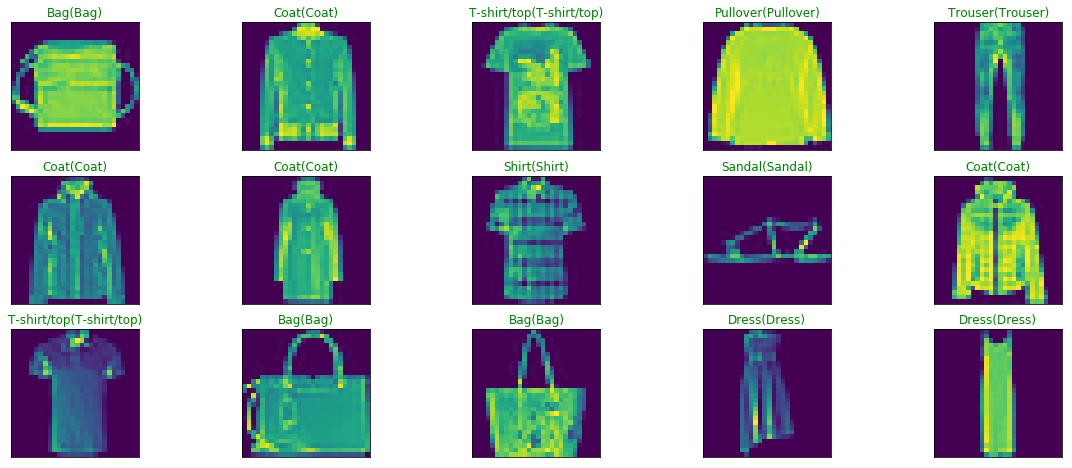

In [28]:
#VISUALIZING PREDICTION

y_hat = model.predict(x_test)

#plot random sample of 10 test images, their predicted labels and true labels
figure = plt.figure(figsize = (20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size = 15, replace = False)):
    ax = figure.add_subplot(3,5,i + 1, xticks = [], yticks =[])
    #Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    #set the title for each image
    ax.set_title("{}({})".format(fashion_mnist_labels[predict_index],
                                 fashion_mnist_labels[true_index]),
                                 color = ("green" if predict_index == true_index else "red"))

plt.show()